In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [24]:
df = pd.read_csv('../../../data/mean-daily-temperature-fisher-river.csv',
                 parse_dates=True)
df.rename(columns={'Mean temparature': 'MeanTemp'}, inplace=True)
df.index = df.Date
df.drop('Date', axis=1, inplace=True)
df.head()

,MeanTemp
Date,
1988-01-01,-23.0
1988-01-02,-20.5
1988-01-03,-22.0
1988-01-04,-30.5
1988-01-05,-31.0


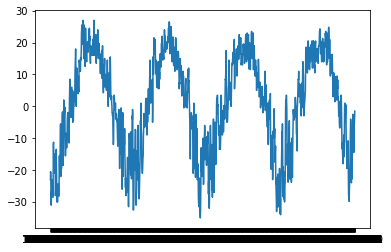

In [16]:
plt.plot(df.MeanTemp);

In [29]:
df['YearMonth'] = df.index.map(lambda d: str(d)[:7])
monthly_stats = df.groupby('YearMonth')['MeanTemp'].agg(
    [np.mean, np.median, np.std])
monthly_stats.reset_index(inplace=True)
monthly_stats.head()

,YearMonth,mean,median,std
0,1988-01,-22.137097,-23.000,5.260640
1,1988-02,-19.025862,-19.500,8.598522
2,1988-03,-8.258065,-9.250,5.341459
3,1988-04,2.641667,1.875,5.057720
4,1988-05,11.290323,11.000,6.254364


In [31]:
monthly_stats['Year'] = monthly_stats.YearMonth.apply(lambda x: x[:4])
monthly_stats['Month'] = monthly_stats.YearMonth.apply(lambda x: x[-2:])
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head()

,YearMonth,mean,median,std,Year,Month
0,1988-01,-22.137097,-23.000,5.260640,1988,01
1,1988-02,-19.025862,-19.500,8.598522,1988,02
2,1988-03,-8.258065,-9.250,5.341459,1988,03
3,1988-04,2.641667,1.875,5.057720,1988,04
4,1988-05,11.290323,11.000,6.254364,1988,05


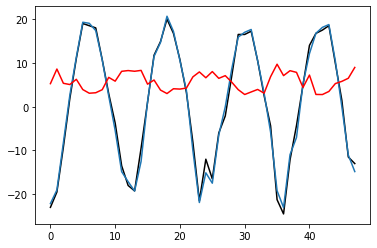

In [35]:
plt.plot(monthly_stats['median'], 'k-');
plt.plot(monthly_stats['mean']);
plt.plot(monthly_stats['std'], 'r-');